In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Reading and cleaning the data

In [3]:
df=pd.read_csv("insurance-data.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
343,63,1,36.765,0,0,0,13981.85035
344,49,0,41.470,4,0,2,10977.20630
345,34,0,29.260,3,0,2,6184.29940
346,33,1,35.750,2,0,2,4889.99950


In [5]:
df.charges.describe()

count      348.000000
mean     14016.426293
std      12638.887852
min       1137.011000
25%       4888.466125
50%       9719.305250
75%      19006.316150
max      51194.559140
Name: charges, dtype: float64

In [4]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [5]:
#Checking for null values
df.isnull().sum().sum()

0

In [6]:
#describe
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


## Data Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

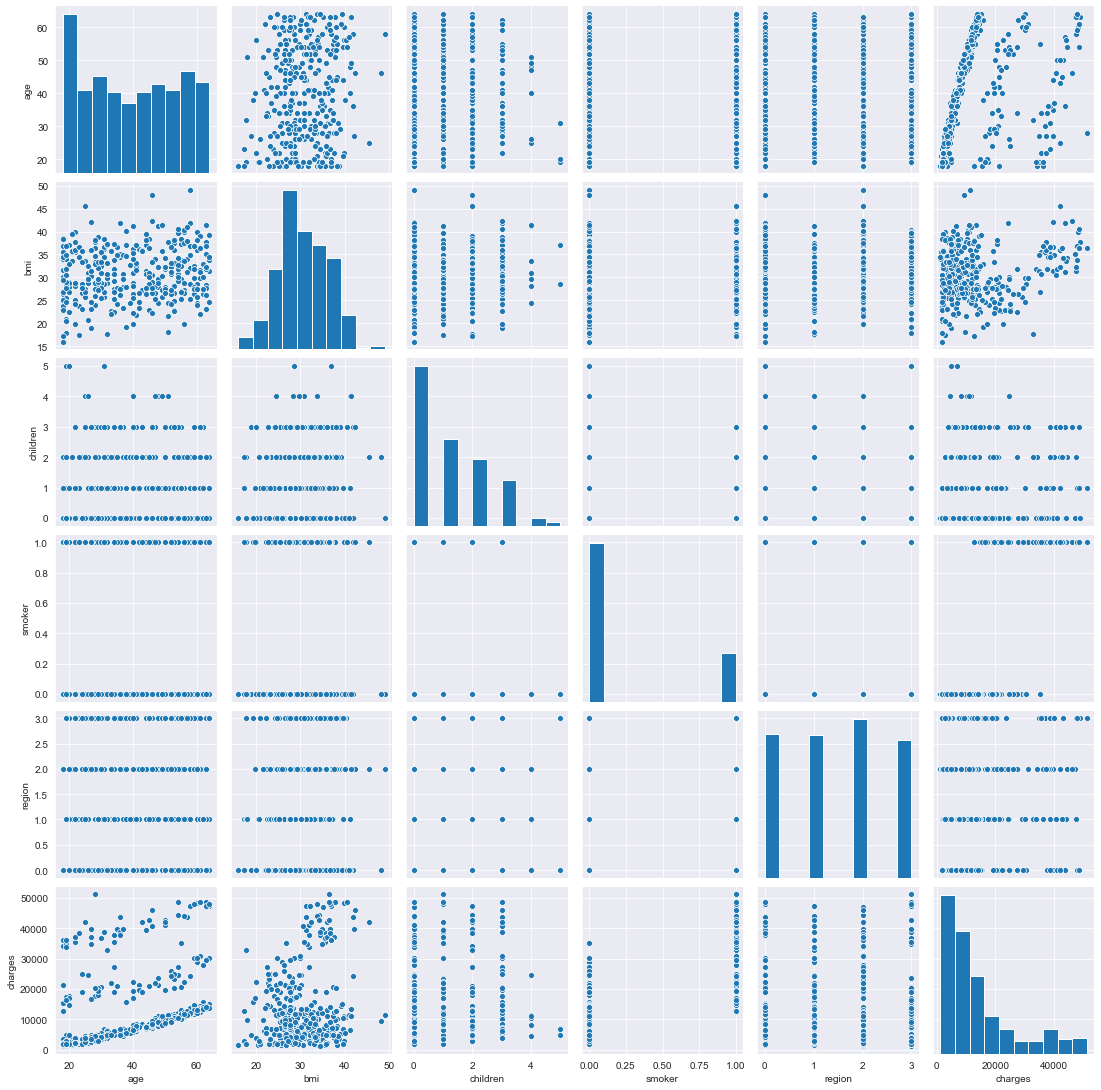

In [8]:
sns.pairplot(df[['age','bmi','children','smoker','region','charges']])
plt.show()

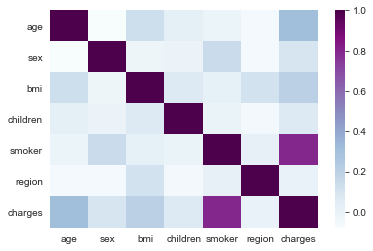

In [9]:
sns.heatmap(df.corr(),cmap='BuPu')
plt.show()

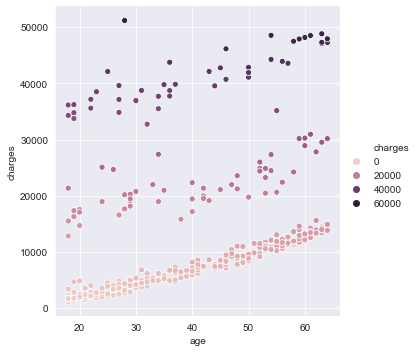

In [10]:
#age v charges
sns.relplot(data=df,x="age",y="charges",hue="charges")
plt.show()

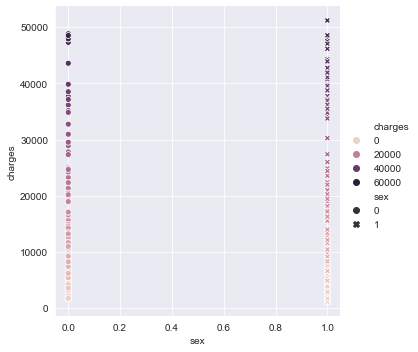

In [11]:
#sex vs charges
sns.relplot(data=df,x="sex",y="charges",hue="charges",style="sex")
plt.show()

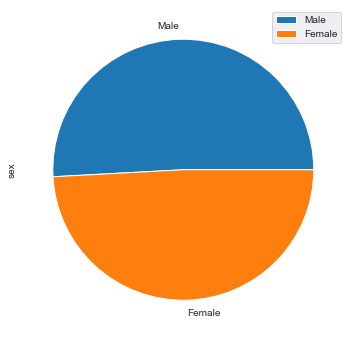

In [12]:
#distributuion of sex
plt.figure(figsize=(6,6))
my_lab=["Male","Female"]
df.sex.value_counts().plot(kind='pie',labels=my_lab)
plt.legend()
plt.show()

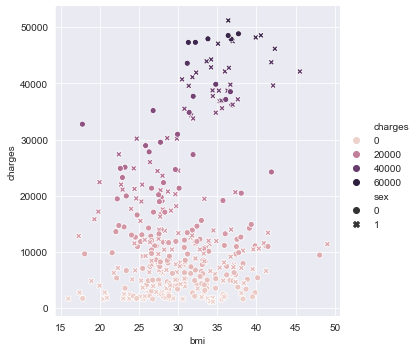

In [13]:
#bmi vs Charges
sns.relplot(data=df,x="bmi",y='charges',hue="charges",style="sex")
plt.show()

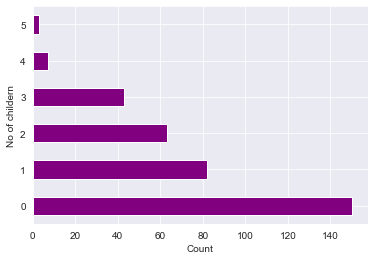

In [14]:
#No of childern
df.children.value_counts().plot(kind="barh",color="purple")
plt.xlabel("Count")
plt.ylabel("No of childern")
plt.show()

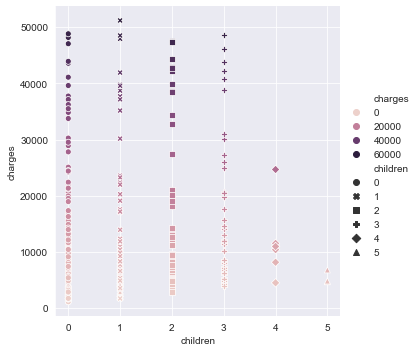

In [15]:
sns.relplot(data=df,x="children",y="charges",hue="charges",style="children")
plt.show()

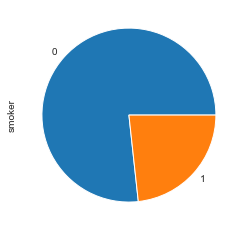

In [16]:
#Smoker or not
df.smoker.value_counts().plot(kind='pie')
plt.show()

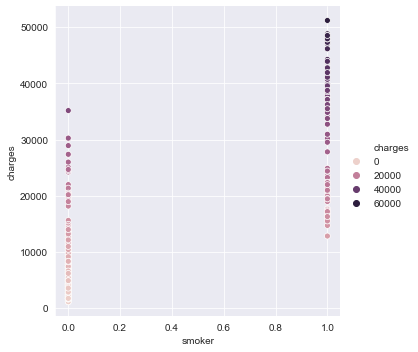

In [17]:
#Smoking vs charges
sns.relplot(data=df,x="smoker",y="charges",hue="charges")
plt.show()

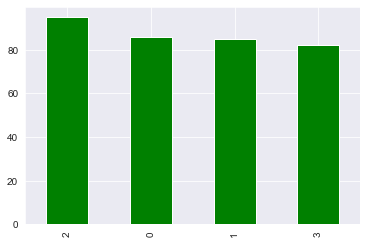

In [18]:
#Region
df.region.value_counts().plot(kind='bar',color='green')
plt.show()

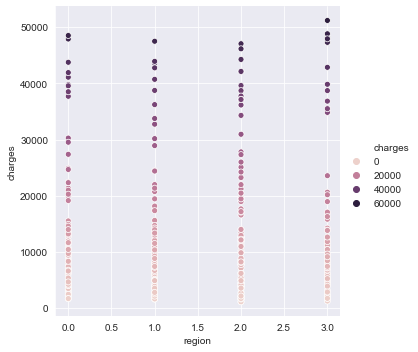

In [19]:
sns.relplot(data=df,x='region',y='charges',hue='charges')
plt.show()

## Splitting and Scaling

In [20]:
#Splitting the data
target=df['charges']
data=df.drop(columns=['charges'])

In [21]:
#Standardization
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# data=sc.fit_transform(data)

In [48]:
data.region.unique()

array([3, 2, 1, 0], dtype=int64)

In [23]:
print(data,target)

     age  sex     bmi  children  smoker  region
0     19    0  27.900         0       1       3
1     18    1  33.770         1       0       2
2     28    1  33.000         3       0       2
3     33    1  22.705         0       0       1
4     32    1  28.880         0       0       1
..   ...  ...     ...       ...     ...     ...
343   63    1  36.765         0       0       0
344   49    0  41.470         4       0       2
345   34    0  29.260         3       0       2
346   33    1  35.750         2       0       2
347   46    1  33.345         1       0       0

[348 rows x 6 columns] 0      16884.92400
1       1725.55230
2       4449.46200
3      21984.47061
4       3866.85520
          ...     
343    13981.85035
344    10977.20630
345     6184.29940
346     4889.99950
347     8334.45755
Name: charges, Length: 348, dtype: float64


In [24]:
#Splitting into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=.3)

In [25]:
print(x_train,y_train)

     age  sex     bmi  children  smoker  region
204   46    1  22.300         0       0       3
297   47    1  25.410         1       1       2
142   34    1  25.300         2       1       2
193   56    0  26.600         1       0       1
19    30    1  35.300         0       1       3
..   ...  ...     ...       ...     ...     ...
42    41    1  21.780         1       0       2
26    63    0  23.085         0       0       0
59    34    0  37.335         2       0       1
258   51    1  24.415         4       0       1
32    19    0  28.600         5       0       3

[243 rows x 6 columns] 204     7147.10500
297    21978.67690
142    18972.49500
193    12044.34200
19     36837.46700
          ...     
42      6272.47720
26     14451.83515
59      5989.52365
258    11520.09985
32      4687.79700
Name: charges, Length: 243, dtype: float64


## Models

- Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [27]:
#Training
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
from sklearn.metrics import mean_squared_error,r2_score

In [29]:
#Score
print(mean_squared_error(lr.predict(x_train),y_train))
print(r2_score(lr.predict(x_train),y_train))

35538877.1355559
0.6935165695670753


In [30]:
#Test
print(mean_squared_error(lr.predict(x_test),y_test))
print(r2_score(lr.predict(x_test),y_test))

39471562.85517315
0.6639509344444072


- Polynomial Rgression

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()

In [32]:
poly_train=poly.fit_transform(x_train)
poly_test=poly.fit_transform(x_test)

In [33]:
#train
pl=LinearRegression()
pl.fit(poly_train,y_train)

LinearRegression()

In [34]:
#scores
print(mean_squared_error(pl.predict(poly_train),y_train))
print(r2_score(pl.predict(poly_train),y_train))

20084499.270424798
0.8495048122512439


In [35]:
#test
print(mean_squared_error(pl.predict(poly_test),y_test))
print(r2_score(pl.predict(poly_test),y_test))

28162875.23698462
0.8043692889791696


- Random Forest


In [36]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=10,min_samples_leaf=15,n_jobs=20)

In [37]:
#Train
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=15, n_jobs=20)

In [38]:
#Score
print(mean_squared_error(rf.predict(x_train),y_train))
print(r2_score(rf.predict(x_train),y_train))

19685837.739745278
0.8400597625079267


In [39]:
#Test
print(mean_squared_error(rf.predict(x_test),y_test))
print(r2_score(rf.predict(x_test),y_test))

21308284.690444484
0.8555728986362914


-Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=6,min_samples_leaf=10)

In [41]:
#train
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=10)

In [42]:
#Score
print(mean_squared_error(dt.predict(x_train),y_train))
print(r2_score(dt.predict(x_train),y_train))

15563140.670047497
0.8855084559038235


In [43]:
#Test
print(mean_squared_error(dt.predict(x_test),y_test))
print(r2_score(dt.predict(x_test),y_test))


22756732.058119684
0.8543858376900655


In [44]:
import pickle 
pickle.dump(dt, open('insurance-model.pkl', 'wb'))


In [45]:
model = pickle.load(open('insurance-model.pkl', 'rb'))

In [46]:
model.predict([[ 32,    0,  29.800,         2,       0,       3]])

array([6008.64071765])